In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configuring visual settings for better readability
sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)

# Loading the dataset
DATA_PATH = "../data/raw/ai4i2020.csv" 

try:
    df = pd.read_csv(DATA_PATH)
    print(f"✅ Dataset loaded successfully. Shape: {df.shape}")
except FileNotFoundError:
    print(f"❌ File not found at {DATA_PATH}. Please check the path.")

✅ Dataset loaded successfully. Shape: (10000, 14)


In [ ]:
# Displaying first 5 rows
display(df.head())

# Checking data types and missing values
print("\n--- Data Info ---")
df.info()

# Check for duplicates (UDI should be unique)
duplicates = df.duplicated(subset=['UDI']).sum()
print(f"\nDuplicate Rows based on UDI: {duplicates}")

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0



--- Data Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Machine failure          10000 non-null  int64  
 9   TWF                      10000 non-null  int64  
 10  HDF                      10000 non-null  int64  
 11  PWF                      10000 non-null  int64  
 12  OSF                      10000 non-null  int64  
 13  RNF                      10000 non-null  int64  
dtypes: f

Normal Operation (0): 9661 (96.61%)
Machine Failure  (1): 339 (3.39%)


C:\Users\praka\AppData\Local\Temp\ipykernel_2724\2123095211.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=target_col, data=df, palette='viridis')


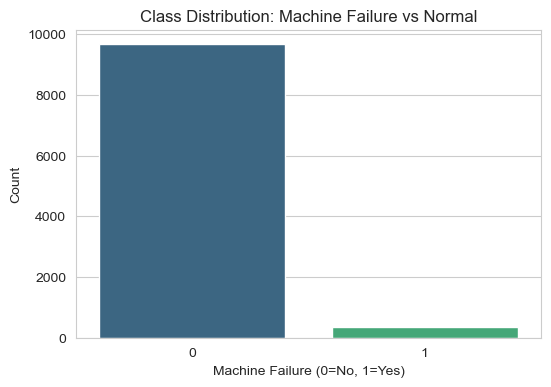

In [ ]:
target_col = 'Machine failure'

# Calculate counts and percentage
failure_counts = df[target_col].value_counts() # Returns a Series with counts of each class
failure_pct = failure_counts / len(df) * 100 

print(f"Normal Operation (0): {failure_counts[0]} ({failure_pct[0]:.2f}%)")
print(f"Machine Failure  (1): {failure_counts[1]} ({failure_pct[1]:.2f}%)")

# Visualize the imbalance
plt.figure(figsize=(6, 4))
sns.countplot(x=target_col, data=df, palette='viridis')
plt.title("Class Distribution: Machine Failure vs Normal")
plt.xlabel("Machine Failure (0=No, 1=Yes)")
plt.ylabel("Count")
plt.show()

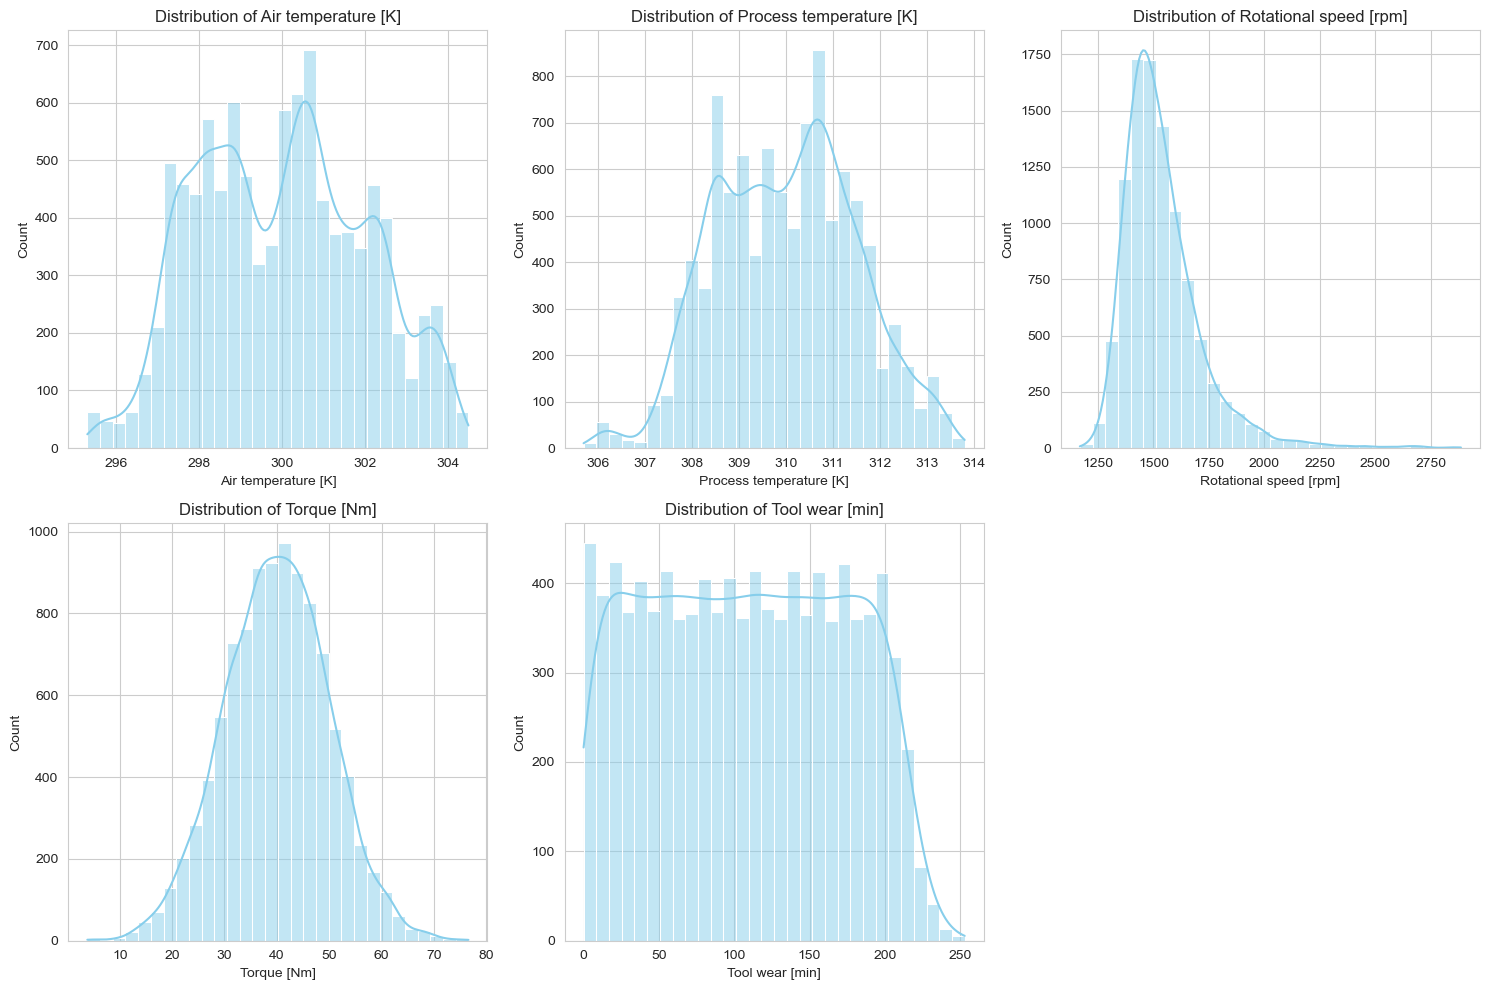

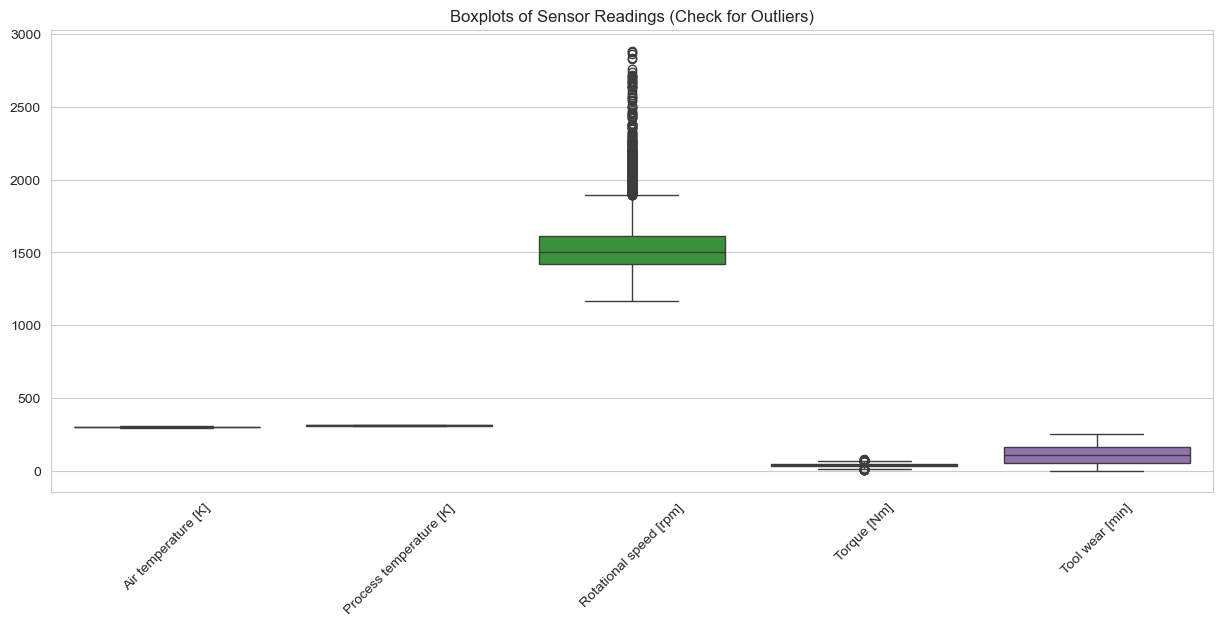

In [ ]:
# Selecting sensor columns (excluding IDs and targets)
sensor_cols = ['Air temperature [K]', 'Process temperature [K]', 
               'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']

# Ploting histograms for each sensor
plt.figure(figsize=(15, 10))
for i, col in enumerate(sensor_cols):
    plt.subplot(2, 3, i+1)
    sns.histplot(df[col], kde=True, bins=30, color='skyblue')
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()

# Boxplots to spot outliers
plt.figure(figsize=(15, 6))
sns.boxplot(data=df[sensor_cols])
plt.title("Boxplots of Sensor Readings (Check for Outliers)")
plt.xticks(rotation=45)
plt.show()

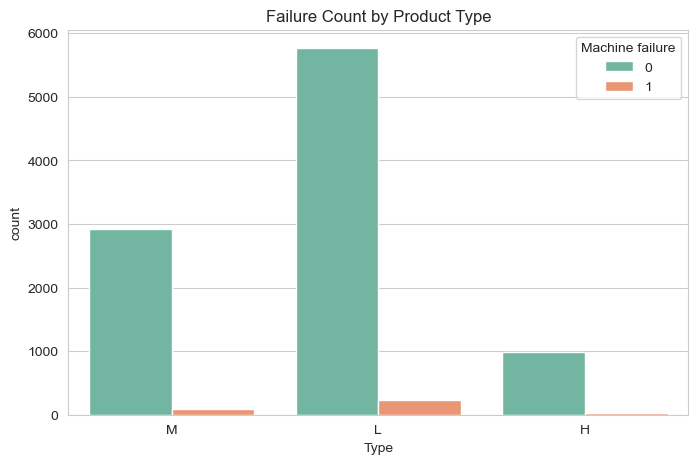


Failure Rate by Product Type:
Type
H    2.093719
L    3.916667
M    2.769436
Name: Machine failure, dtype: float64


In [6]:
# The 'Type' column (L=Low, M=Medium, H=High quality)
plt.figure(figsize=(8, 5))
sns.countplot(x='Type', hue='Machine failure', data=df, palette='Set2')
plt.title("Failure Count by Product Type")
plt.show()

# Calculate failure rate per type
type_failure_rates = df.groupby('Type')['Machine failure'].mean() * 100
print("\nFailure Rate by Product Type:")
print(type_failure_rates)

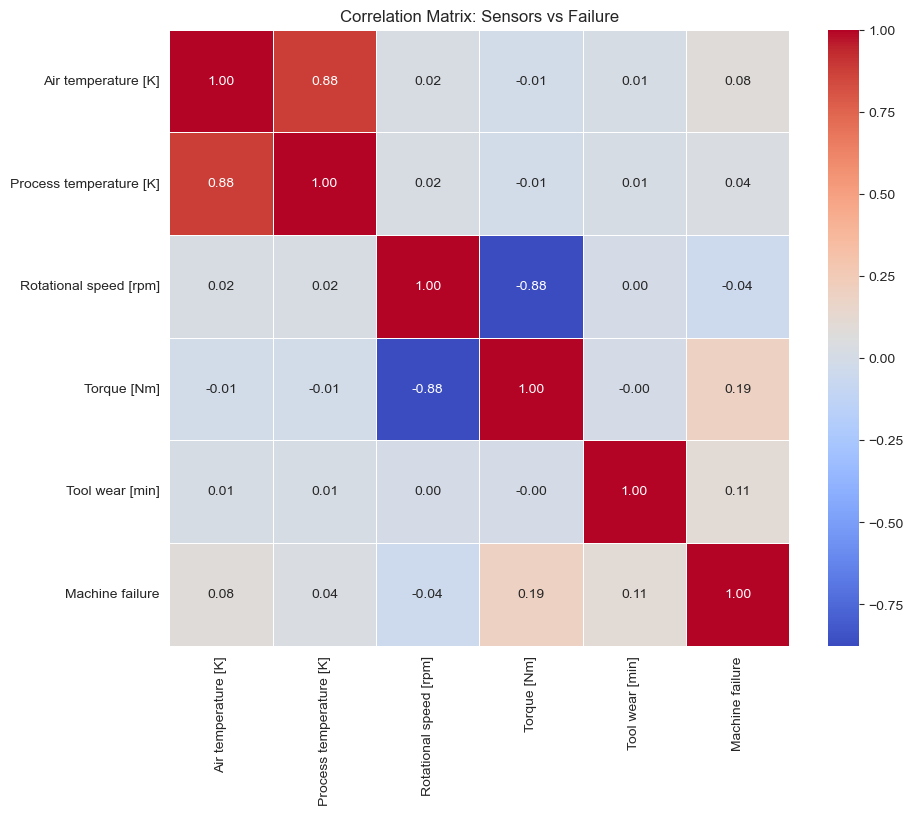

In [7]:
# Calculate correlation matrix
corr_matrix = df[sensor_cols + ['Machine failure']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix: Sensors vs Failure")
plt.show()


***

# 📊 EDA Summary & Strategic Plan: Predictive Maintenance

**Project:** Smart IIoT Monitoring System (PdM Module)
**Date:** December 05, 2025
**Dataset:** AI4I 2020 Predictive Maintenance Dataset (10,000 samples)

---

## 1. Dataset Audit & Integrity
We performed an initial audit to ensure the data is reliable before modeling.

* **Dimensions:** The dataset contains **10,000 rows** and **14 columns**.
* **Missing Values:** There are **0 missing values** across all columns. Imputation is not required.
* **Duplicates:** There are **0 duplicate rows** based on the unique identifier (`UDI`), ensuring data uniqueness.
* **Data Types:**
    * **Numeric (Float/Int):** Sensor readings (`Air temperature`, `Torque`, etc.) are correctly formatted for mathematical operations.
    * **Categorical (Object):** `Product ID` and `Type` are strings and will require encoding.

---

## 2. Target Variable Analysis (The "Failure" Signal)
The primary goal is to predict the binary target `Machine failure`.

* **Class Distribution:**
    * **Normal Operation (0):** 9,661 samples (**96.6%**)
    * **Failure (1):** 339 samples (**3.4%**)
* **Implication:** The dataset suffers from **severe class imbalance**.
    * *Risk:* A model that blindly guesses "No Failure" will achieve 96.6% accuracy but fail completely at its job.
    * *Strategy:* We **must** use resampling techniques (e.g., SMOTE, Random Oversampling) or Class Weights during training. Evaluation must prioritize **Recall**(usefull when false negative need to be minimized) and **F1-Score**(usefull with imbalanced dataset) over Accuracy.

---

## 3. Sensor Data Analysis (Univariate)
We analyzed the behavior of the five key sensors to establish "baseline" normal behavior.

### A. Temperature Sensors (`Air` & `Process`)
* **Distribution:** Both follow similar multi-modal distributions, shifting slightly based on ambient conditions.
* **Relationship:** `Process temperature` is consistently **~10K higher** than `Air temperature`.
    * *Air Temp Range:* 295K – 304K
    * *Process Temp Range:* 306K – 314K
* **Insight:** The fixed offset suggests the machine generates consistent heat during operation. Deviations from this gap could indicate **Heat Dissipation Failure (HDF)**.

### B. Mechanical Load (`Torque` & `Rotational speed`)
* **Torque:** Follows a perfect **Normal Distribution** centered around **40 Nm**.
    * *Outliers:* Boxplots reveal distinct outliers **> 70 Nm** and **< 10 Nm**. These extreme values likely correspond to **Overstrain Failures (OSF)**.
* **Rotational Speed:** Right-skewed distribution with a peak around **1500 rpm**.
    * *Outliers:* A long tail extends up to **2800 rpm**. High-speed anomalies are critical indicators for **Power Failures (PWF)**.

### C. Tool Health (`Tool wear`)
* **Distribution:** **Uniform Distribution** across 0 to 250 minutes.
* **Insight:** The dataset captures the entire lifecycle of the cutting tools evenly. We expect the probability of failure to increase linearly or exponentially as `Tool wear` approaches 200+ minutes (**Tool Wear Failure**).

---

## 4. Categorical Analysis: Product Quality
The `Type` feature indicates the quality of the product being manufactured (Low, Medium, High).

* **Failure Rates by Type:**
    * **L (Low Quality):** 3.9% Failure Rate
    * **M (Medium Quality):** 2.8% Failure Rate
    * **H (High Quality):** 2.1% Failure Rate
* **Finding:** There is a clear correlation between product quality and machine stress. **Low-quality products cause significantly more machine failures** than high-quality ones.
* **Action:** This feature is predictive and must be included in the model (using Ordinal Encoding: L=0, M=1, H=2).

---

## 5. Correlation Analysis (Multivariate)
The correlation matrix revealed critical physical dependencies between sensors.

| Feature Pair | Correlation | Interpretation |
| :--- | :--- | :--- |
| **Torque vs. Speed** | **-0.88 (Strong Negative)** | Confirms the physics of power ($P = \tau \times \omega$). As speed rises, torque drops. This strong relationship means using both raw features might introduce multicollinearity. |
| **Air Temp vs. Process Temp** | **+0.88 (Strong Positive)** | Highly redundant. The machine's temp follows the room temp. We should create a `Temperature Difference` feature to isolate the machine's generated heat. |
| **Torque vs. Failure** | **+0.19 (Positive)** | The strongest single linear predictor of failure. High torque loads break the machine. |
| **Tool wear vs. Failure** | **+0.11 (Positive)** | Confirms that older tools are more likely to fail. |

---

## 6. Strategic Recommendations for Phase 2

Based on these findings, we define the following pipeline for the next phase:

### A. Feature Engineering
We will create synthetic features to capture the physical relationships we discovered:
1.  **`Power` (Watts):** `Torque` $\times$ `Rotational speed`. (Captures the interaction between load and speed).
2.  **`Temp_Diff` (Kelvin):** `Process temperature` - `Air temperature`. (Isolates machine efficiency from ambient weather).
3.  **`Wear_Status`:** Binning `Tool wear` into categories (e.g., "New", "Used", "Critical") could help decision tree models.

### B. Data Preprocessing
1.  **Encoding:** Apply **Ordinal Encoding** to `Type` (Low < Medium < High).
2.  **Scaling:** Since `Speed` (~1500) and `Torque` (~40) have vastly different ranges, we must apply **StandardScaler** to normalize all numeric features.
3.  **Cleaning:** Drop `UDI` and `Product ID` as they are identifiers with no predictive power.

### C. Modeling Strategy
1.  **Algorithm:** **Random Forest** and **XGBoost** are ideal because they can handle the non-linear "outliers" (which are actually failures) better than Logistic Regression.
2.  **Imbalance Handling:** We will use **SMOTE** (Synthetic Minority Over-sampling Technique) to synthetically boost the failure class from 3.4% to ~50% in the training set only.